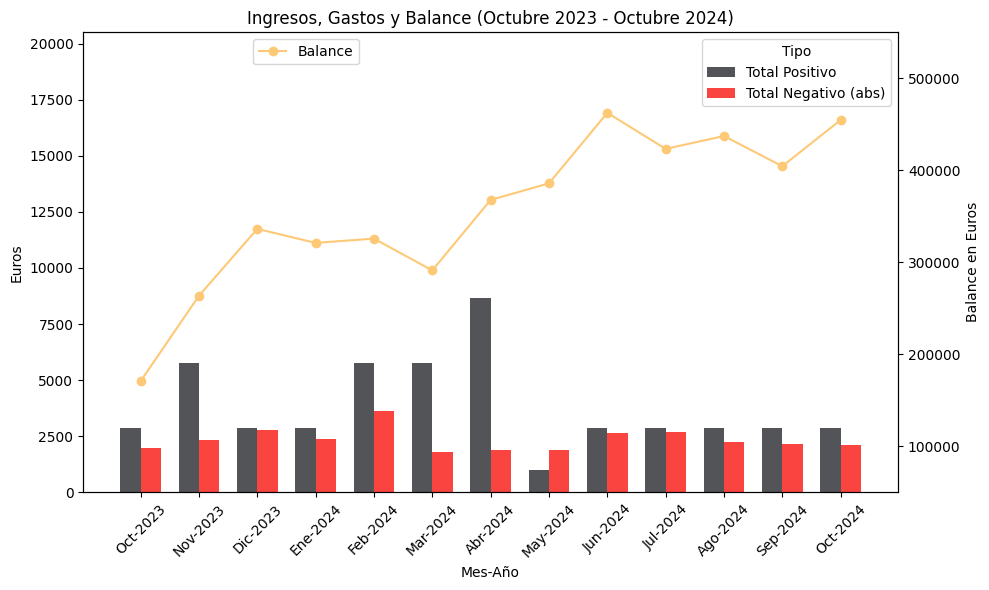

    Mes   Ano   Mes-Ano  total_positivo  total_negativo    Balance
10  Oct  2023  Oct-2023         2881.39        -1974.36  170857.06
9   Nov  2023  Nov-2023         5762.78        -2330.10  263710.14
2   Dic  2023  Dic-2023         2881.39        -2785.89  336363.32
3   Ene  2024  Ene-2024         2881.39        -2376.63  321155.82
4   Feb  2024  Feb-2024         5762.78        -3620.63  325787.98
7   Mar  2024  Mar-2024         5762.78        -1795.52  291293.95
0   Abr  2024  Abr-2024         8644.17        -1898.28  367850.43
8   May  2024  May-2024         1004.05        -1891.44  385844.44
6   Jun  2024  Jun-2024         2881.39        -2646.74  462524.67
5   Jul  2024  Jul-2024         2881.39        -2681.45  423336.99
1   Ago  2024  Ago-2024         2881.39        -2265.83  437300.31
12  Sep  2024  Sep-2024         2881.39        -2163.04  404492.90
11  Oct  2024  Oct-2024         2881.39        -2112.93  454736.20
Error cuadrático medio (MSE): 1571478.55
R^2 (Coeficiente de d

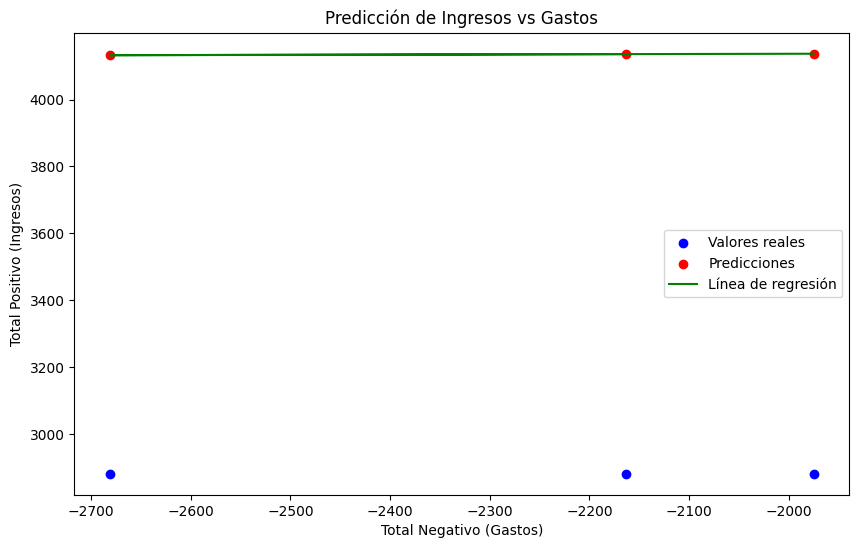

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Leer el archivo CSV
archivo_csv = 'DATOS_FINAL_BBK_3.csv'
df = pd.read_csv(archivo_csv, sep='\t')

# Crear una columna 'Mes-Ano' que combina 'Mes' y 'Ano'
df['Mes-Ano'] = df['Mes'].astype(str) + '-' + df['Ano'].astype(str)

# Agrupar por 'Mes' y 'Ano' y calcular la suma de las columnas requeridas
df_agrupado = df.groupby(['Mes', 'Ano', 'Mes-Ano']).agg(
    total_positivo=('total_positivo', 'sum'),
    total_negativo=('total_negativo', 'sum'),
    Balance=('Balance', 'sum')
).reset_index()

# Definir el orden personalizado para 'Mes-Ano'
orden_meses = [
    'Oct-2023', 'Nov-2023', 'Dic-2023',  
    'Ene-2024', 'Feb-2024', 'Mar-2024', 
    'Abr-2024', 'May-2024', 'Jun-2024', 
    'Jul-2024', 'Ago-2024', 'Sep-2024', 
    'Oct-2024'
]

# Convertir la columna 'Mes-Ano' a categoría ordenada
df_agrupado['Mes-Ano'] = pd.Categorical(df_agrupado['Mes-Ano'], categories=orden_meses, ordered=True)

# Ordenar el DataFrame por 'Mes-Ano' en orden definido
df_agrupado = df_agrupado.sort_values(by='Mes-Ano')

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 6))

# Configurar la posición de las barras
x = np.arange(len(df_agrupado['Mes-Ano']))  # posiciones en el eje X
width = 0.35  # ancho de las barras

# Gráfico de total positivo (barras azules)
ax1.bar(x - width / 2, df_agrupado['total_positivo'], width, color='#525457', label='Total Positivo')

# Gráfico de total negativo (barras rojas), en valores absolutos
ax1.bar(x + width / 2, df_agrupado['total_negativo'].abs(), width, color='#fa443f', label='Total Negativo (abs)')

# Crear un segundo eje Y para el Balance
ax2 = ax1.twinx()

# Cambiar la barra de Balance por una línea
ax2.plot(x, df_agrupado['Balance'], color='#fec977', marker='o', linestyle='-', label='Balance')

# Configurar el eje Y para los valores de las barras
ax1.set_ylabel('Euros')
ax1.set_xlabel('Mes-Año')
ax1.set_title('Ingresos, Gastos y Balance (Octubre 2023 - Octubre 2024)')
ax1.set_xticks(x)
ax1.set_xticklabels(df_agrupado['Mes-Ano'], rotation=45)

# Ajustar el límite superior del eje Y izquierdo
ax1.set_ylim(0, 20500)

# Configurar el eje Y derecho para el Balance
ax2.set_ylabel('Balance en Euros')
ax2.set_ylim(50000, 550000)  # Limitar el eje Y derecho

# Leyenda para el eje Y izquierdo
ax1.legend(title='Tipo', bbox_to_anchor=(1, 1), loc='upper right')

# Leyenda para el eje Y derecho
ax2.legend(bbox_to_anchor=(0.2, 1), loc='upper left')

plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Mostrar el DataFrame de totales
print(df_agrupado)

# Preparar datos para el modelo predictivo
# Usar 'total_positivo' como variable dependiente y 'total_negativo' como variable independiente
X = df_agrupado[['total_negativo']]  # Variable independiente (gastos)
y = df_agrupado['total_positivo']    # Variable dependiente (ingresos)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'R^2 (Coeficiente de determinación): {r2:.2f}')

# Visualizar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Valores reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones')
plt.plot(X_test, y_pred, color='green', linestyle='-', label='Línea de regresión')
plt.xlabel('Total Negativo (Gastos)')
plt.ylabel('Total Positivo (Ingresos)')
plt.title('Predicción de Ingresos vs Gastos')
plt.legend()
plt.show()
